In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import random
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report 

In [2]:
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC' : 'Squamous cell carcinoma'
} 

In [3]:

seed = 1
random.seed(seed)
directory = '../input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input'
images_path = Path('../input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/')
path_ground_truth_data = '../input/isic-2019/ISIC_2019_Training_GroundTruth.csv'

tabular_data = pd.read_csv('/kaggle/input/isic-2019/ISIC_2019_Training_Metadata.csv')
# tabular_data.

In [4]:
ground_truth_labels = pd.read_csv(path_ground_truth_data)
print(ground_truth_labels.head())

          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


In [5]:
tabular_data.columns

Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')

In [6]:
# sns.countplot(x = 'dx', data = tabular_data)
# plt.xlabel('Disease', size=12)
# plt.ylabel('Frequency', size=12)
# plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

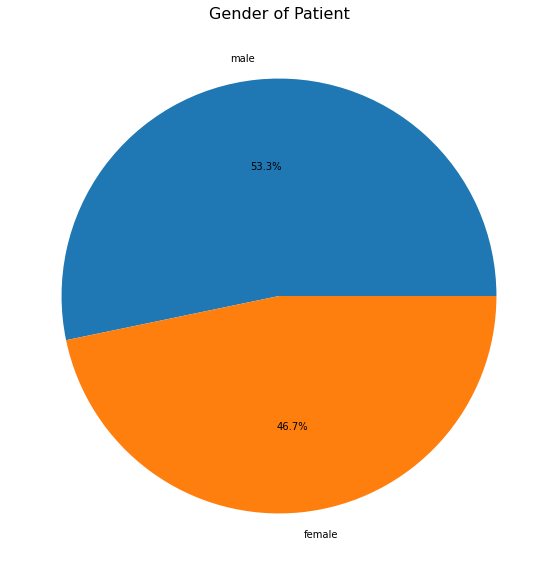

In [7]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

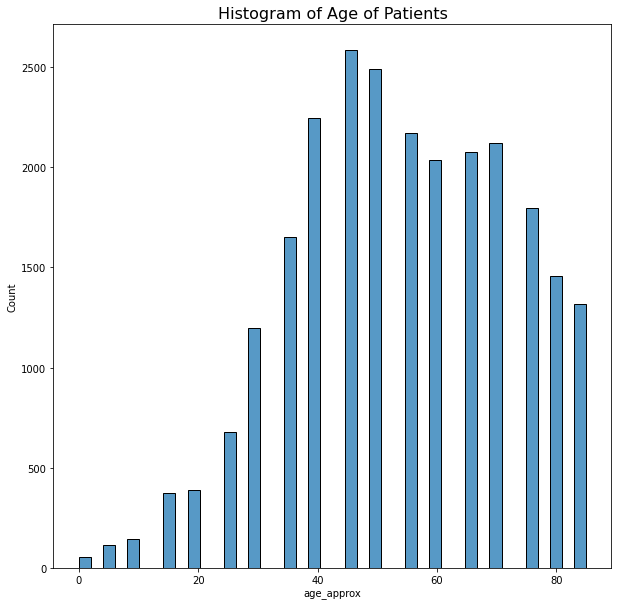

In [8]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age_approx'])
plt.title('Histogram of Age of Patients', size=16)

In [9]:
ground_truth_labels.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
ground_truth_labels.corr()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
MEL,1.000000,-0.473941,-0.181140,-0.087758,-0.158468,-0.045496,-0.046822,-0.074327,NaN
NV,-0.473941,1.000000,-0.395056,-0.191395,-0.345610,-0.099224,-0.102117,-0.162102,NaN
BCC,-0.181140,-0.395056,1.000000,-0.073151,-0.132092,-0.037923,-0.039029,-0.061955,NaN
AK,-0.087758,-0.191395,-0.073151,1.000000,-0.063995,-0.018373,-0.018909,-0.030016,NaN
BKL,-0.158468,-0.345610,-0.132092,-0.063995,1.000000,-0.033177,-0.034144,-0.054201,NaN
DF,-0.045496,-0.099224,-0.037923,-0.018373,-0.033177,1.000000,-0.009803,-0.015561,NaN
VASC,-0.046822,-0.102117,-0.039029,-0.018909,-0.034144,-0.009803,1.000000,-0.016015,NaN
SCC,-0.074327,-0.162102,-0.061955,-0.030016,-0.054201,-0.015561,-0.016015,1.000000,NaN
UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

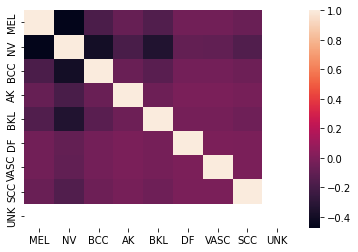

In [11]:
sns.heatmap(ground_truth_labels.corr())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


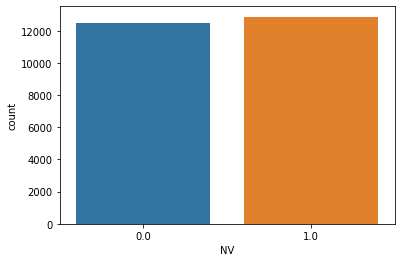

1.0    12875
0.0    12456
Name: NV, dtype: int64

In [12]:
sns.countplot(ground_truth_labels['NV'])
plt.show()
ground_truth_labels['NV'].value_counts()



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


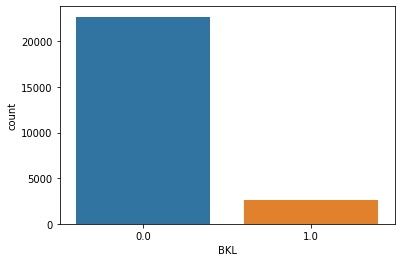

0.0    22707
1.0     2624
Name: BKL, dtype: int64

In [13]:
sns.countplot(ground_truth_labels['BKL'])
plt.show()
ground_truth_labels['BKL'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


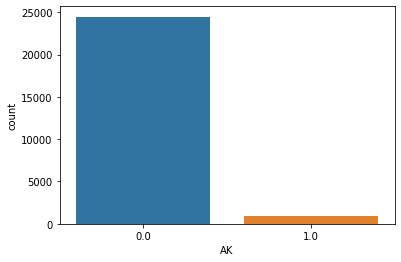

0.0    24464
1.0      867
Name: AK, dtype: int64

In [14]:


sns.countplot(ground_truth_labels['AK'])
plt.show()
ground_truth_labels['AK'].value_counts()



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


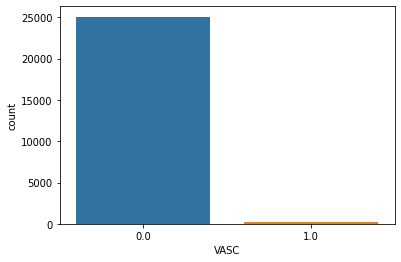

0.0    25078
1.0      253
Name: VASC, dtype: int64

In [15]:
sns.countplot(ground_truth_labels['VASC'])
plt.show()
ground_truth_labels['VASC'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


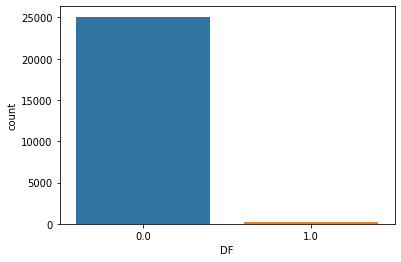

0.0    25092
1.0      239
Name: DF, dtype: int64

In [16]:
sns.countplot(ground_truth_labels['DF'])
plt.show()
ground_truth_labels['DF'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


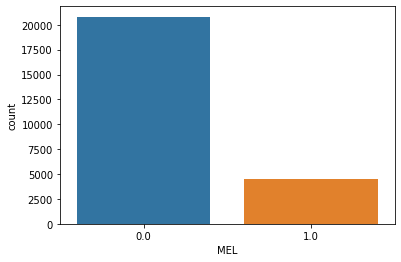

0.0    20809
1.0     4522
Name: MEL, dtype: int64

In [17]:


sns.countplot(ground_truth_labels['MEL'])
plt.show()
ground_truth_labels['MEL'].value_counts()



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


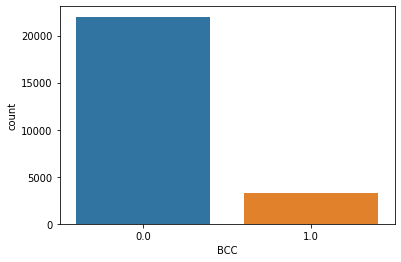

0.0    22008
1.0     3323
Name: BCC, dtype: int64

In [18]:
sns.countplot(ground_truth_labels['BCC'])
plt.show()
ground_truth_labels['BCC'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


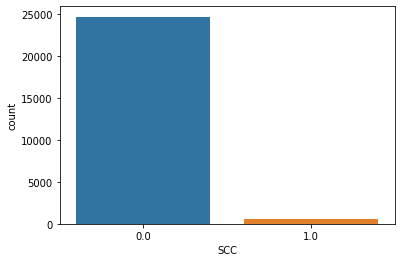

0.0    24703
1.0      628
Name: SCC, dtype: int64

In [19]:
sns.countplot(ground_truth_labels['SCC'])
plt.show()
ground_truth_labels['SCC'].value_counts()

In [20]:
# print all columns
pd.set_option('display.max_columns', None)

# inhibit graphics card runs out of memory
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-11-26 17:22:15.922697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:22:16.016225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:22:16.017091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [21]:
from IPython.display import clear_output
clear_output()

import os
import shutil
import random
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


In [22]:
ground_truth_labels.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

In [23]:
CLASSES = ground_truth_labels.columns[1:-1].values
print(CLASSES)

['MEL' 'NV' 'BCC' 'AK' 'BKL' 'DF' 'VASC' 'SCC']


In [24]:
# isic_path='/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input'
# def get_isic_df():
#     df = pd.read_csv('/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv')
#     path_img = 'ISIC_2019_Training_Input'
    
#     for label in df.columns[1:]:
#         df.loc[df[label] == 1.0, 'label'] = label
        
#     df.rename(columns={'image': 'name'}, inplace=True)
#     df['name'] = df['name'].apply(lambda x: "{}/{}.jpg".format(isic_path,x))
#     df = df[['name', 'label']]
#     return df

In [25]:
# df=get_isic_df()

In [26]:
# df.label.unique()

In [27]:
# ax = sns.countplot(x="label", data=get_isic_df(), order=['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF','UNK'])

In [28]:
# xtra_tfms = (cutout(n_holes=(1,1), length=(16,16), p=.5))
# tfms = get_transforms(max_rotate=45, 
#                       p_affine=0.5, 
#                       p_lighting=0.5,
#                       do_flip=True, 
#                       flip_vert=True, 
#                       max_zoom=1.05, 
#                       max_warp=None, 
#                       max_lighting=0.2,
#                       xtra_tfms=xtra_tfms)

In [29]:
images = [path.as_posix() for path in list(images_path.rglob("*jpg"))]
labels = list()
for path in tqdm(images):
    name = path.split('/')[-1].split('.')[0]
    label = ground_truth_labels[ground_truth_labels.image == name].iloc[:,1:].values.argmax()
    labels.append(label)
classes = len(np.unique(labels))
assert len(images)==len(labels), 'Not equal number images and labels'

100%|██████████| 25331/25331 [00:53<00:00, 469.96it/s]


In [30]:
weights_loss = []

for i in set(labels):
    x=1 / (labels.count(i) / len(labels))
    weights_loss.append(x)
    print(f'{i} --> {labels.count(i)} --> {x}')


0 --> 4522 --> 5.60172490048651
1 --> 12875 --> 1.9674563106796117
2 --> 3323 --> 7.62293108636774
3 --> 867 --> 29.21683967704729
4 --> 2624 --> 9.653582317073171
5 --> 239 --> 105.98744769874477
6 --> 253 --> 100.12252964426878
7 --> 628 --> 40.3359872611465


In [31]:
normalized_weights = [x / sum(weights_loss) for x in weights_loss]

In [32]:
normalized_weights

[0.018640820213303235,
 0.00654709040812095,
 0.025366773699836663,
 0.09722467013213061,
 0.03212415739502943,
 0.3526936778433357,
 0.33317703163856616,
 0.13422577866967714]

In [33]:
class_weights=dict()
for i in range(8):
    class_weights[i]=normalized_weights[i]

In [34]:
class_weights

{0: 0.018640820213303235,
 1: 0.00654709040812095,
 2: 0.025366773699836663,
 3: 0.09722467013213061,
 4: 0.03212415739502943,
 5: 0.3526936778433357,
 6: 0.33317703163856616,
 7: 0.13422577866967714}

In [35]:
len(labels)

25331

In [36]:
classes

8

25331 25331


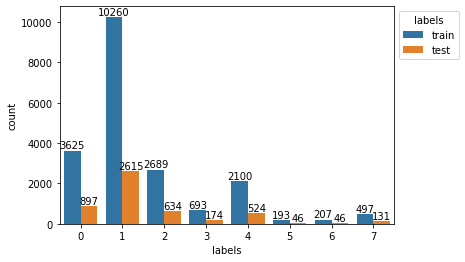

In [37]:
number_validation_images = int(len(images) * 0.8)
train_images, train_labels = images[:number_validation_images], labels[:number_validation_images]
test_images, test_labels = images[number_validation_images:], labels[number_validation_images:]

cur_labels = train_labels + test_labels
splits = ['train' for _ in range(len(train_labels))] + ['test' for _ in range(len(test_labels))] 
print(len(labels), len(splits))
df = pd.DataFrame(list(zip(cur_labels, splits)),
               columns =['labels', 'splits'])

p = sns.countplot(data=df, x='labels', hue='splits')
p.legend(title='labels', bbox_to_anchor=(1, 1), loc='upper left')

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')


In [38]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [260, 260], 'nearest')
    image /= 255
    return image

def data_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label   

def load_and_preprocess_from_path_labels(path, label):
    return load_and_preprocess_image(path), label


train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.map(load_and_preprocess_from_path_labels, num_parallel_calls=tf.data.AUTOTUNE)\
                   .map(data_augment, num_parallel_calls=tf.data.AUTOTUNE)\
                   .shuffle(2048).batch(10).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(load_and_preprocess_from_path_labels, num_parallel_calls=tf.data.AUTOTUNE).batch(10).prefetch(tf.data.AUTOTUNE)

2022-11-26 17:24:08.644177: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 17:24:08.644804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:24:08.645734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:24:08.646405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [39]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

2022-11-26 17:24:11.444380: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-26 17:24:21.451547: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 891 of 2048
2022-11-26 17:24:31.451778: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1815 of 2048
2022-11-26 17:24:34.033475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


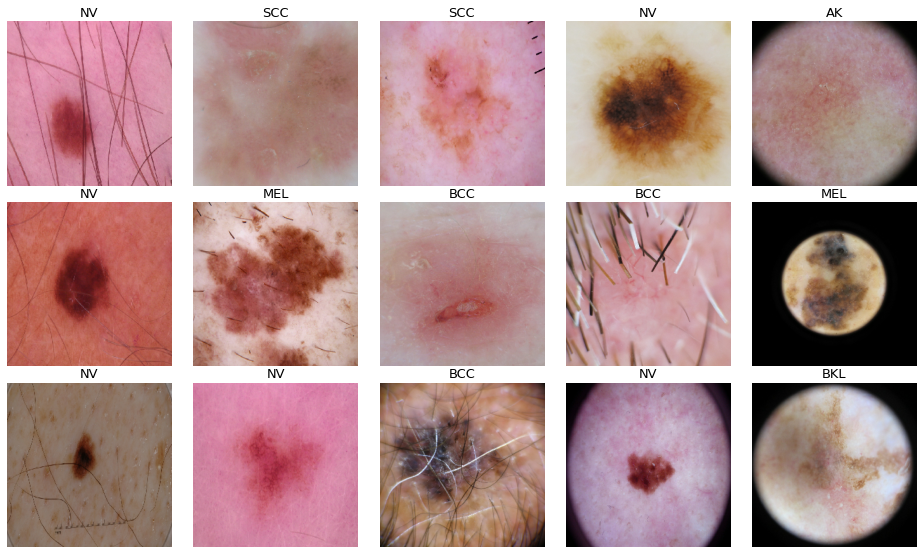

In [40]:


ds_iter = next(iter(train_ds.unbatch().batch(15)))
display_batch_of_images(ds_iter)



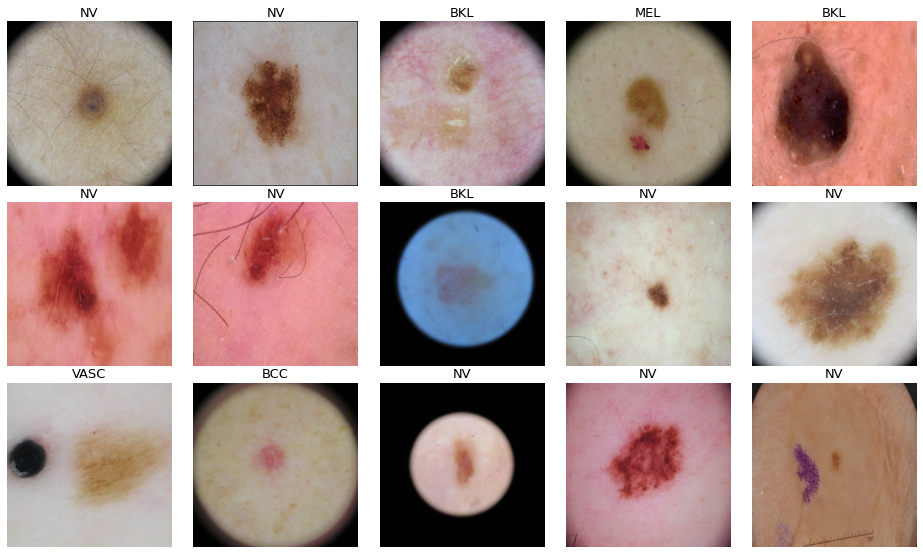

In [41]:


ds_iter = next(iter(test_ds.unbatch().batch(15)))
display_batch_of_images(ds_iter)



In [42]:
# LR_START = 0.00001
# LR_MAX = 0.00005 
# LR_MIN = 0.00001
# LR_RAMPUP_EPOCHS = 4
# LR_SUSTAIN_EPOCHS = 0
# LR_EXP_DECAY = .8
# EPOCHS = 10

# def lrfn(epoch):
#     if epoch < LR_RAMPUP_EPOCHS:
#         lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
#     elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
#         lr = LR_MAX
#     else:
#         lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
#     return lr
    
# lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

# rng = [i for i in range(EPOCHS)]
# y = [lrfn(x) for x in rng]
# plt.plot(rng, y)
# print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [43]:
# from tensorflow import keras
# model = keras.applications.EfficientNetB2(include_top=True)

# # for input you can also do model.input,
# # then for base_outputs you can obviously
# # choose other than simply removing the last one :)
# base_inputs = model.layers[0].input
# base_outputs = model.layers[-1].output
# classifier = layers.Dense(classes)(base_outputs)
# new_model = keras.Model(inputs=base_inputs, outputs=classifier)


# model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=False),],
#     metrics=["sparse_categorical_accuracy"],
# )


# history = model.fit(
#     train_ds,
#     validation_data=test_ds,
#     batch_size=2,
#     epochs=EPOCHS,
#     verbose=1,
#     callbacks=lr_callback,
# )

In [44]:
#Soft Attention

from keras import backend as K
from keras.layers import Layer,InputSpec,Input,BatchNormalization,MaxPooling2D,concatenate,Activation,Dropout
import keras.layers as kl
import tensorflow as tf
from tensorflow.keras import Model



class SoftAttention(Layer):
    def __init__(self,ch,m,concat_with_x=False,aggregate=False,**kwargs):
        self.channels=int(ch)
        self.multiheads = m
        self.aggregate_channels = aggregate
        self.concat_input_with_scaled = concat_with_x

        
        super(SoftAttention,self).__init__(**kwargs)

    def build(self,input_shape):

        self.i_shape = input_shape

        kernel_shape_conv3d = (self.channels, 3, 3) + (1, self.multiheads) # DHWC
    
        self.out_attention_maps_shape = input_shape[0:1]+(self.multiheads,)+input_shape[1:-1]
        
        if self.aggregate_channels==False:

            self.out_features_shape = input_shape[:-1]+(input_shape[-1]+(input_shape[-1]*self.multiheads),)
        else:
            if self.concat_input_with_scaled:
                self.out_features_shape = input_shape[:-1]+(input_shape[-1]*2,)
            else:
                self.out_features_shape = input_shape
        

        self.kernel_conv3d = self.add_weight(shape=kernel_shape_conv3d,
                                        initializer='he_uniform',
                                        name='kernel_conv3d')
        self.bias_conv3d = self.add_weight(shape=(self.multiheads,),
                                      initializer='zeros',
                                      name='bias_conv3d')

        super(SoftAttention, self).build(input_shape)

    def call(self, x):

        exp_x = K.expand_dims(x,axis=-1)

        c3d = K.conv3d(exp_x,
                     kernel=self.kernel_conv3d,
                     strides=(1,1,self.i_shape[-1]), padding='same', data_format='channels_last')
        conv3d = K.bias_add(c3d,
                        self.bias_conv3d)
        conv3d = kl.Activation('relu')(conv3d)

        conv3d = K.permute_dimensions(conv3d,pattern=(0,4,1,2,3))

        
        conv3d = K.squeeze(conv3d, axis=-1)
        conv3d = K.reshape(conv3d,shape=(-1, self.multiheads ,self.i_shape[1]*self.i_shape[2]))

        softmax_alpha = K.softmax(conv3d, axis=-1) 
        softmax_alpha = kl.Reshape(target_shape=(self.multiheads, self.i_shape[1],self.i_shape[2]))(softmax_alpha)

        
        if self.aggregate_channels==False:
            exp_softmax_alpha = K.expand_dims(softmax_alpha, axis=-1)       
            exp_softmax_alpha = K.permute_dimensions(exp_softmax_alpha,pattern=(0,2,3,1,4))
   
            x_exp = K.expand_dims(x,axis=-2)
   
            u = kl.Multiply()([exp_softmax_alpha, x_exp])   
  
            u = kl.Reshape(target_shape=(self.i_shape[1],self.i_shape[2],u.shape[-1]*u.shape[-2]))(u)

        else:
            exp_softmax_alpha = K.permute_dimensions(softmax_alpha,pattern=(0,2,3,1))

            exp_softmax_alpha = K.sum(exp_softmax_alpha,axis=-1)

            exp_softmax_alpha = K.expand_dims(exp_softmax_alpha, axis=-1)

            u = kl.Multiply()([exp_softmax_alpha, x])   

        if self.concat_input_with_scaled:
            o = kl.Concatenate(axis=-1)([u,x])
        else:
            o = u
        
        return [o, softmax_alpha]

    def compute_output_shape(self, input_shape): 
        return [self.out_features_shape, self.out_attention_maps_shape]

    
    def get_config(self):
        return super(SoftAttention,self).get_config()
 

In [45]:
MainInput=Input(shape=(260, 260, 3))

conv=(Conv2D(filters=64,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(MainInput))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=64,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D(strides=(2, 2),padding="same")(conv))

conv=(Conv2D(filters=128,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=128,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D()(conv))


conv=(Conv2D(filters=256,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=256,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=256,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D()(conv))

conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

attention_layer,map2 = SoftAttention(aggregate=True,m=16,concat_with_x=False,ch=int(conv.shape[-1]),name='soft_attention')(conv)
attention_layer=(MaxPooling2D(pool_size=(2, 2),padding="same")(attention_layer))
conv=(MaxPooling2D(pool_size=(2, 2),padding="same")(conv))

conv = concatenate([conv,attention_layer])
conv=Activation("relu")(conv)
conv= Dropout(0.5)(conv)

conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D(pool_size=(4, 4),padding="same")(conv))

conv=(Flatten()(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(8, activation="softmax")(conv))



In [46]:
from tensorflow.keras.models import Model
model = Model(inputs=MainInput, outputs=conv)

In [47]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 260, 260, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 260, 260, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 260, 260, 64) 4160        batch_normalization[0][0]        
______________________________________________________________________________________________

In [48]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [49]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])


In [50]:
history = model.fit(train_ds,
#                     validation_split=0.2,
                    validation_data=test_ds,
                    batch_size = 128,
                    epochs = 50,
                    callbacks=[callback],
                   class_weight=class_weights)

Epoch 1/50


2022-11-26 17:24:50.483182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1301 of 2048
2022-11-26 17:24:56.260796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-11-26 17:24:57.300000: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2027/2027 [==============================] - 393s 169ms/step - loss: 0.0936 - accuracy: 0.1753 - val_loss: 1.7776 - val_accuracy: 0.3671

Epoch 00001: saving model to best_model.h5
Epoch 2/50


2022-11-26 17:32:12.395128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1024 of 2048
2022-11-26 17:32:22.404295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2027 of 2048
2022-11-26 17:32:22.573126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 336s 156ms/step - loss: 0.0590 - accuracy: 0.2096 - val_loss: 1.7583 - val_accuracy: 0.2781

Epoch 00002: saving model to best_model.h5
Epoch 3/50


2022-11-26 17:37:50.497132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1127 of 2048
2022-11-26 17:37:58.672944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 343s 160ms/step - loss: 0.0645 - accuracy: 0.1997 - val_loss: 2.2380 - val_accuracy: 0.0091

Epoch 00003: saving model to best_model.h5
Epoch 4/50


2022-11-26 17:44:12.410716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1036 of 2048
2022-11-26 17:44:21.425335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 340s 158ms/step - loss: 0.0561 - accuracy: 0.0139 - val_loss: 2.1059 - val_accuracy: 0.0091

Epoch 00004: saving model to best_model.h5
Epoch 5/50


2022-11-26 17:50:34.327800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1033 of 2048
2022-11-26 17:50:43.479126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 343s 160ms/step - loss: 0.0556 - accuracy: 0.0099 - val_loss: 2.0810 - val_accuracy: 0.0091

Epoch 00005: saving model to best_model.h5
Epoch 6/50


2022-11-26 17:56:56.249664: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1011 of 2048


   1/2027 [..............................] - ETA: 11:08:51 - loss: 0.0225 - accuracy: 0.0000e+00

2022-11-26 17:57:05.844947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 161ms/step - loss: 0.0556 - accuracy: 0.0275 - val_loss: 2.0779 - val_accuracy: 0.0091

Epoch 00006: saving model to best_model.h5
Epoch 7/50


2022-11-26 18:02:43.545673: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1068 of 2048
2022-11-26 18:02:52.648769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 346s 161ms/step - loss: 0.0556 - accuracy: 0.0322 - val_loss: 2.0753 - val_accuracy: 0.1251

Epoch 00007: saving model to best_model.h5
Epoch 8/50


2022-11-26 18:09:05.459802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1019 of 2048
2022-11-26 18:09:14.844507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 161ms/step - loss: 0.0563 - accuracy: 0.0481 - val_loss: 2.0851 - val_accuracy: 0.1251

Epoch 00008: saving model to best_model.h5
Epoch 9/50


2022-11-26 18:15:27.375221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1090 of 2048


   1/2027 [..............................] - ETA: 10:53:19 - loss: 0.0564 - accuracy: 0.2000

2022-11-26 18:15:36.525242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 344s 160ms/step - loss: 0.0556 - accuracy: 0.0534 - val_loss: 2.0780 - val_accuracy: 0.1251

Epoch 00009: saving model to best_model.h5
Epoch 10/50


2022-11-26 18:21:13.395433: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1059 of 2048
2022-11-26 18:21:22.812027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 160ms/step - loss: 0.0556 - accuracy: 0.0382 - val_loss: 2.0747 - val_accuracy: 0.1251

Epoch 00010: saving model to best_model.h5
Epoch 11/50


2022-11-26 18:27:35.310633: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 795 of 2048
2022-11-26 18:27:45.311011: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1641 of 2048
2022-11-26 18:27:50.011864: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 366s 168ms/step - loss: 0.0556 - accuracy: 0.0461 - val_loss: 2.0776 - val_accuracy: 0.1251

Epoch 00011: saving model to best_model.h5
Epoch 12/50


2022-11-26 18:33:43.855875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1082 of 2048
2022-11-26 18:33:52.773946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 344s 160ms/step - loss: 0.0556 - accuracy: 0.0259 - val_loss: 2.0740 - val_accuracy: 0.1251

Epoch 00012: saving model to best_model.h5
Epoch 13/50


2022-11-26 18:39:31.193179: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1052 of 2048


   1/2027 [..............................] - ETA: 10:56:17 - loss: 0.1101 - accuracy: 0.3000

2022-11-26 18:39:40.434905: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 161ms/step - loss: 0.0556 - accuracy: 0.0477 - val_loss: 2.0758 - val_accuracy: 0.1251

Epoch 00013: saving model to best_model.h5
Epoch 14/50


2022-11-26 18:45:53.111047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 968 of 2048
2022-11-26 18:46:03.004095: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 342s 159ms/step - loss: 0.0556 - accuracy: 0.0661 - val_loss: 2.0766 - val_accuracy: 0.1251

Epoch 00014: saving model to best_model.h5
Epoch 15/50


2022-11-26 18:52:15.019806: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 955 of 2048
2022-11-26 18:52:25.026643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1978 of 2048
2022-11-26 18:52:25.682202: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 339s 157ms/step - loss: 0.0556 - accuracy: 0.0419 - val_loss: 2.0745 - val_accuracy: 0.1251

Epoch 00015: saving model to best_model.h5
Epoch 16/50


2022-11-26 18:58:36.927153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 884 of 2048


   1/2027 [..............................] - ETA: 11:08:20 - loss: 0.0320 - accuracy: 0.2000

2022-11-26 18:58:46.522131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 339s 157ms/step - loss: 0.0556 - accuracy: 0.0314 - val_loss: 2.0820 - val_accuracy: 0.1251

Epoch 00016: saving model to best_model.h5
Epoch 17/50


2022-11-26 19:04:18.600064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 981 of 2048
2022-11-26 19:04:28.590582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2008 of 2048
2022-11-26 19:04:28.967690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 325s 150ms/step - loss: 0.0556 - accuracy: 0.0436 - val_loss: 2.0795 - val_accuracy: 0.1251

Epoch 00017: saving model to best_model.h5
Epoch 18/50


2022-11-26 19:09:46.353758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1013 of 2048


   1/2027 [..............................] - ETA: 10:14:12 - loss: 0.0774 - accuracy: 0.2000

2022-11-26 19:09:54.332408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 330s 154ms/step - loss: 0.0556 - accuracy: 0.0226 - val_loss: 2.0745 - val_accuracy: 0.1251

Epoch 00018: saving model to best_model.h5
Epoch 19/50


2022-11-26 19:16:08.257565: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 830 of 2048
2022-11-26 19:16:18.270104: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1779 of 2048
2022-11-26 19:16:20.957792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 340s 156ms/step - loss: 0.0556 - accuracy: 0.0456 - val_loss: 2.0742 - val_accuracy: 0.1251

Epoch 00019: saving model to best_model.h5
Epoch 20/50


2022-11-26 19:21:50.656177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1083 of 2048
2022-11-26 19:21:58.043508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 330s 154ms/step - loss: 0.0556 - accuracy: 0.0459 - val_loss: 2.0768 - val_accuracy: 0.1251

Epoch 00020: saving model to best_model.h5
Epoch 21/50


2022-11-26 19:27:23.237255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 825 of 2048
2022-11-26 19:27:33.228849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1798 of 2048
2022-11-26 19:27:35.705028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 340s 157ms/step - loss: 0.0556 - accuracy: 0.0551 - val_loss: 2.0778 - val_accuracy: 0.1251

Epoch 00021: saving model to best_model.h5
Epoch 22/50


2022-11-26 19:33:45.138623: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 813 of 2048
2022-11-26 19:33:55.136564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1915 of 2048


   1/2027 [..............................] - ETA: 11:54:25 - loss: 0.0556 - accuracy: 0.2000

2022-11-26 19:33:56.102196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 361s 168ms/step - loss: 0.0556 - accuracy: 0.0246 - val_loss: 2.0762 - val_accuracy: 0.1251

Epoch 00022: saving model to best_model.h5
Epoch 23/50


2022-11-26 19:40:07.048873: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 931 of 2048
2022-11-26 19:40:17.045155: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1912 of 2048
2022-11-26 19:40:19.111614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 342s 158ms/step - loss: 0.0556 - accuracy: 0.0408 - val_loss: 2.0766 - val_accuracy: 0.1251

Epoch 00023: saving model to best_model.h5
Epoch 24/50


2022-11-26 19:46:29.003371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 897 of 2048


   1/2027 [..............................] - ETA: 10:55:12 - loss: 0.0316 - accuracy: 0.4000

2022-11-26 19:46:38.199993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 332s 154ms/step - loss: 0.0556 - accuracy: 0.0518 - val_loss: 2.0756 - val_accuracy: 0.1251

Epoch 00024: saving model to best_model.h5
Epoch 25/50


2022-11-26 19:52:50.911047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 960 of 2048
2022-11-26 19:53:00.909916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1954 of 2048
2022-11-26 19:53:02.132767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 338s 156ms/step - loss: 0.0556 - accuracy: 0.0584 - val_loss: 2.0769 - val_accuracy: 0.1251

Epoch 00025: saving model to best_model.h5
Epoch 26/50


2022-11-26 19:59:12.812856: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 938 of 2048
2022-11-26 19:59:21.462362: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 329s 153ms/step - loss: 0.0556 - accuracy: 0.0451 - val_loss: 2.0758 - val_accuracy: 0.1251

Epoch 00026: saving model to best_model.h5
Epoch 27/50


2022-11-26 20:05:34.735454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 818 of 2048
2022-11-26 20:05:44.728794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1806 of 2048
2022-11-26 20:05:47.263622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 337s 155ms/step - loss: 0.0556 - accuracy: 0.0456 - val_loss: 2.0744 - val_accuracy: 0.1251

Epoch 00027: saving model to best_model.h5
Epoch 28/50


2022-11-26 20:11:56.647064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1169 of 2048
2022-11-26 20:12:03.816000: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 331s 155ms/step - loss: 0.0556 - accuracy: 0.0616 - val_loss: 2.0763 - val_accuracy: 0.1251

Epoch 00028: saving model to best_model.h5
Epoch 29/50


2022-11-26 20:17:29.829171: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 774 of 2048
2022-11-26 20:17:39.812663: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1757 of 2048
2022-11-26 20:17:42.918627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 342s 157ms/step - loss: 0.0556 - accuracy: 0.0250 - val_loss: 2.0776 - val_accuracy: 0.1251

Epoch 00029: saving model to best_model.h5
Epoch 30/50


2022-11-26 20:23:51.724768: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1052 of 2048
2022-11-26 20:23:59.657013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 336s 157ms/step - loss: 0.0556 - accuracy: 0.0335 - val_loss: 2.0762 - val_accuracy: 0.1251

Epoch 00030: saving model to best_model.h5
Epoch 31/50


2022-11-26 20:29:29.974926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 833 of 2048
2022-11-26 20:29:39.989360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1747 of 2048
2022-11-26 20:29:42.903040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 341s 157ms/step - loss: 0.0556 - accuracy: 0.0444 - val_loss: 2.0752 - val_accuracy: 0.1251

Epoch 00031: saving model to best_model.h5
Epoch 32/50


2022-11-26 20:35:13.920804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 817 of 2048
2022-11-26 20:35:23.914780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1802 of 2048


   1/2027 [..............................] - ETA: 12:26:16 - loss: 0.0479 - accuracy: 0.0000e+00

2022-11-26 20:35:25.818365: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 374s 174ms/step - loss: 0.0556 - accuracy: 0.0530 - val_loss: 2.0735 - val_accuracy: 0.1251

Epoch 00032: saving model to best_model.h5
Epoch 33/50


2022-11-26 20:41:35.832360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 910 of 2048
2022-11-26 20:41:45.838294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1826 of 2048
2022-11-26 20:41:48.136923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 348s 161ms/step - loss: 0.0556 - accuracy: 0.0601 - val_loss: 2.0736 - val_accuracy: 0.1251

Epoch 00033: saving model to best_model.h5
Epoch 34/50


2022-11-26 20:47:26.335033: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 911 of 2048


   1/2027 [..............................] - ETA: 11:16:38 - loss: 0.0428 - accuracy: 0.2000

2022-11-26 20:47:36.172068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 338s 157ms/step - loss: 0.0556 - accuracy: 0.0336 - val_loss: 2.0777 - val_accuracy: 0.1251

Epoch 00034: saving model to best_model.h5
Epoch 35/50


2022-11-26 20:53:48.256171: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 776 of 2048
2022-11-26 20:53:58.243039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1704 of 2048
2022-11-26 20:54:01.782719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 343s 157ms/step - loss: 0.0556 - accuracy: 0.0519 - val_loss: 2.0765 - val_accuracy: 0.1251

Epoch 00035: saving model to best_model.h5
Epoch 36/50


2022-11-26 20:59:32.941595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 804 of 2048
2022-11-26 20:59:42.947330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1931 of 2048


   1/2027 [..............................] - ETA: 11:50:29 - loss: 0.0250 - accuracy: 0.1000

2022-11-26 20:59:43.789482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 337s 156ms/step - loss: 0.0556 - accuracy: 0.0295 - val_loss: 2.0736 - val_accuracy: 0.1251

Epoch 00036: saving model to best_model.h5
Epoch 37/50


2022-11-26 21:05:54.854606: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 722 of 2048
2022-11-26 21:06:04.854391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1658 of 2048
2022-11-26 21:06:08.820585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 344s 158ms/step - loss: 0.0556 - accuracy: 0.0243 - val_loss: 2.0698 - val_accuracy: 0.1251

Epoch 00037: saving model to best_model.h5
Epoch 38/50


2022-11-26 21:11:40.749753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 791 of 2048
2022-11-26 21:11:50.756198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1923 of 2048
2022-11-26 21:11:51.644987: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 339s 157ms/step - loss: 0.0556 - accuracy: 0.0497 - val_loss: 2.0726 - val_accuracy: 0.1251

Epoch 00038: saving model to best_model.h5
Epoch 39/50


2022-11-26 21:17:21.902700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 943 of 2048
2022-11-26 21:17:31.906777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1693 of 2048
2022-11-26 21:17:35.662657: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 158ms/step - loss: 0.0556 - accuracy: 0.0787 - val_loss: 2.0777 - val_accuracy: 0.1251

Epoch 00039: saving model to best_model.h5
Epoch 40/50


2022-11-26 21:23:08.785659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1098 of 2048
2022-11-26 21:23:16.633224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 340s 159ms/step - loss: 0.0556 - accuracy: 0.0653 - val_loss: 2.0774 - val_accuracy: 0.1251

Epoch 00040: saving model to best_model.h5
Epoch 41/50


2022-11-26 21:28:52.483599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 753 of 2048
2022-11-26 21:29:02.473859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1748 of 2048


   1/2027 [..............................] - ETA: 13:04:40 - loss: 0.0596 - accuracy: 0.5000

2022-11-26 21:29:05.492189: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 342s 157ms/step - loss: 0.0556 - accuracy: 0.0581 - val_loss: 2.0746 - val_accuracy: 0.1251

Epoch 00041: saving model to best_model.h5
Epoch 42/50


2022-11-26 21:35:14.374566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 723 of 2048
2022-11-26 21:35:24.374075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1770 of 2048


   1/2027 [..............................] - ETA: 12:45:11 - loss: 0.0571 - accuracy: 0.1000

2022-11-26 21:35:26.831868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 363s 168ms/step - loss: 0.0556 - accuracy: 0.0526 - val_loss: 2.0788 - val_accuracy: 0.1251

Epoch 00042: saving model to best_model.h5
Epoch 43/50


2022-11-26 21:41:36.285756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 923 of 2048
2022-11-26 21:41:46.290608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1933 of 2048
2022-11-26 21:41:47.384166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 353s 164ms/step - loss: 0.0556 - accuracy: 0.0369 - val_loss: 2.0754 - val_accuracy: 0.1251

Epoch 00043: saving model to best_model.h5
Epoch 44/50


2022-11-26 21:47:31.925714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 836 of 2048
2022-11-26 21:47:41.936671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1954 of 2048


   1/2027 [..............................] - ETA: 11:53:03 - loss: 0.0265 - accuracy: 0.0000e+00

2022-11-26 21:47:42.847907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 342s 158ms/step - loss: 0.0556 - accuracy: 0.0443 - val_loss: 2.0731 - val_accuracy: 0.1251

Epoch 00044: saving model to best_model.h5
Epoch 45/50


2022-11-26 21:53:15.927595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 977 of 2048
2022-11-26 21:53:25.939599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1687 of 2048
2022-11-26 21:53:29.652484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 345s 158ms/step - loss: 0.0556 - accuracy: 0.0417 - val_loss: 2.0760 - val_accuracy: 0.1251

Epoch 00045: saving model to best_model.h5
Epoch 46/50


2022-11-26 21:59:03.617248: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 766 of 2048
2022-11-26 21:59:13.618118: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1949 of 2048


   1/2027 [..............................] - ETA: 11:48:12 - loss: 0.0595 - accuracy: 0.0000e+00

2022-11-26 21:59:14.383367: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 343s 159ms/step - loss: 0.0556 - accuracy: 0.0702 - val_loss: 2.0763 - val_accuracy: 0.1251

Epoch 00046: saving model to best_model.h5
Epoch 47/50


2022-11-26 22:05:25.536783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 651 of 2048
2022-11-26 22:05:35.529667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1648 of 2048
2022-11-26 22:05:39.885221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 347s 159ms/step - loss: 0.0556 - accuracy: 0.0526 - val_loss: 2.0790 - val_accuracy: 0.1251

Epoch 00047: saving model to best_model.h5
Epoch 48/50


2022-11-26 22:11:47.444858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 748 of 2048
2022-11-26 22:11:57.457620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1893 of 2048
2022-11-26 22:11:59.075343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 341s 158ms/step - loss: 0.0556 - accuracy: 0.0341 - val_loss: 2.0761 - val_accuracy: 0.1251

Epoch 00048: saving model to best_model.h5
Epoch 49/50


2022-11-26 22:17:31.098629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 681 of 2048
2022-11-26 22:17:41.107052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1661 of 2048
2022-11-26 22:17:44.868022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 347s 159ms/step - loss: 0.0556 - accuracy: 0.0772 - val_loss: 2.0748 - val_accuracy: 0.1251

Epoch 00049: saving model to best_model.h5
Epoch 50/50


2022-11-26 22:23:19.782355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1081 of 2048
2022-11-26 22:23:27.666488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2027/2027 [==============================] - 339s 158ms/step - loss: 0.0556 - accuracy: 0.0206 - val_loss: 2.0747 - val_accuracy: 0.1251

Epoch 00050: saving model to best_model.h5


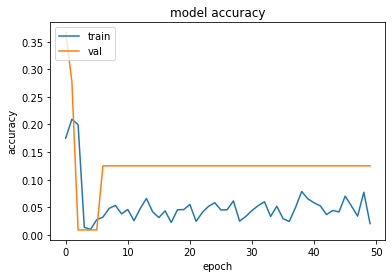

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

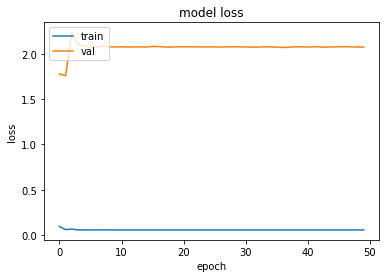

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
model.load_weights('best_model.h5')


In [54]:
from sklearn.metrics import confusion_matrix , classification_report


In [55]:
# display_training_curves(
#     history.history['loss'],
#     history.history['val_loss'],
#     'loss',
#     211,
# )
# display_training_curves(
#     history.history['sparse_categorical_accuracy'],
#     history.history['val_sparse_categorical_accuracy'],
#     'accuracy',
#     212,
# )

In [56]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

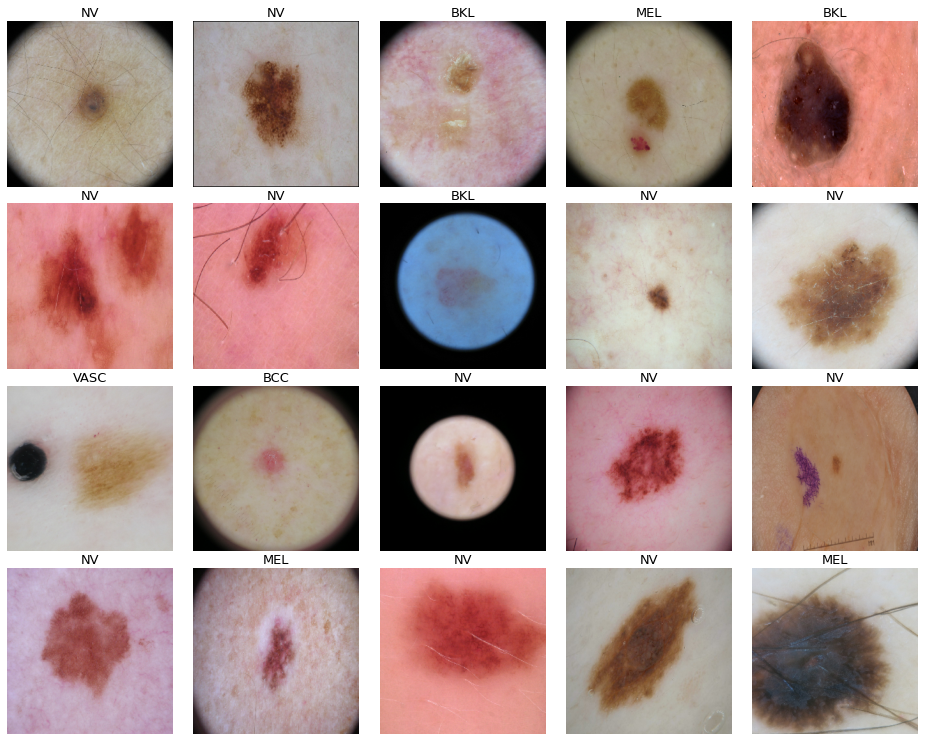

In [57]:
dataset = test_ds.unbatch().batch(20)
batch = iter(dataset)

images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

In [58]:
model.evaluate(test_ds)

507/507 [==============================] - 41s 81ms/step - loss: 2.0747 - accuracy: 0.1251


[2.0746729373931885, 0.12512335181236267]

In [59]:
y_pred=model.predict(test_ds)

In [60]:
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [61]:
cm=confusion_matrix(predicted_categories, true_categories)

<AxesSubplot:>

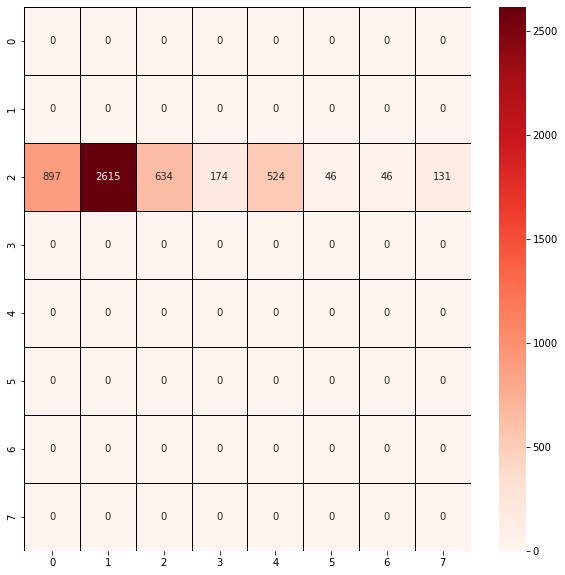

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [63]:
report = classification_report(predicted_categories, true_categories)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.13      0.22      5067
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.13      5067
   macro avg       0.12      0.02      0.03      5067
weighted avg       1.00      0.13      0.22      5067



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
